# Feature Selection

## 1. Removing constant features using variance threshold

In [3]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [4]:
df = pd.DataFrame({
    'A': [1,3,5,6,2],
    'B': [9,8,4,5,6],
    'C': [0,0,0,0,0],
    'D': [1,1,1,1,1]
})

In [5]:
df.head()

,A,B,C,D
0,1,9,0,1
1,3,8,0,1
2,5,4,0,1
3,6,5,0,1
4,2,6,0,1


In [6]:
var_thres = VarianceThreshold(threshold = 0) # threshold means how much variation we want
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [7]:
const_cols  = [col for col in df.columns if col not in df.columns[var_thres.get_support()]]
len(const_cols)

2

In [8]:
const_cols

['C', 'D']

## 2. Dropping features using Pearson Correlation

In [9]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
data = fetch_california_housing()
df = pd.DataFrame(data=data.data, columns = data.feature_names)

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [13]:
X = df.drop(['AveOccup'],axis = 1)
y = df['AveOccup']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

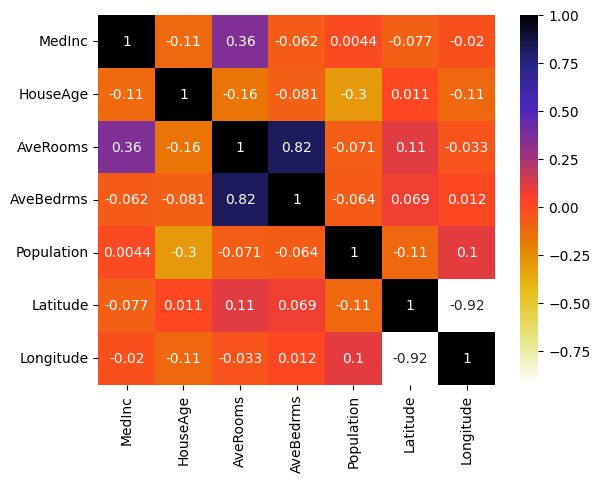

In [14]:
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [15]:
def get_correlated_cols(dataset,threshold=0.85):
    corr_mat = dataset.corr()
    cols_name = set()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (corr_mat.iloc[i,j])>threshold:
                cols_name.add(corr_mat.columns[i])
    return cols_name
    

In [16]:
get_correlated_cols(X_train,0.7)

{'AveBedrms'}

## 3. Feature selection using information gain for classification

In [17]:
import pandas as pd
from sklearn.datasets import load_wine

In [18]:
data = load_wine()
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [19]:
df['target'] = data.target

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [21]:
from sklearn.feature_selection import mutual_info_classif

In [22]:
X = df.drop(['target'],axis = 1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info # ranges 0 to 1 higher is better

array([0.49354954, 0.32499453, 0.06933511, 0.30502464, 0.16708749,
       0.44653593, 0.68442412, 0.11952798, 0.32120623, 0.5898984 ,
       0.41139423, 0.48568505, 0.56413841])

In [23]:
mutual_info = pd.Series(mutual_info)

In [24]:
mutual_info_sorted = mutual_info.sort_values(ascending=False)

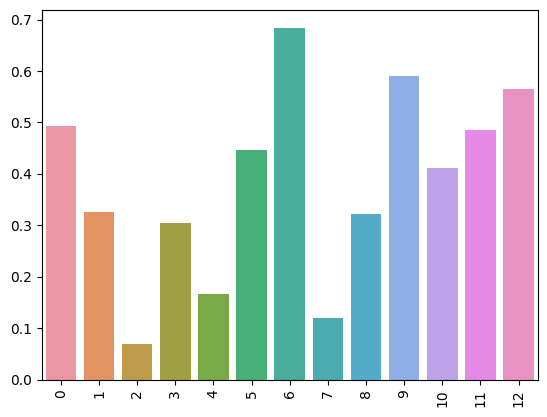

In [25]:
sns.barplot(x=mutual_info_sorted.index,y=mutual_info_sorted)
plt.xticks(rotation=90)
plt.show()

In [26]:
from sklearn.feature_selection import SelectKBest

In [27]:
select_cols = SelectKBest(mutual_info_classif,k=10)
select_cols.fit(X_train,y_train)
X_train.columns[select_cols.get_support()]

Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'total_phenols',
       'flavanoids', 'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

## Feature selection using information gain for regression problem

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [29]:
data = fetch_california_housing()
df = pd.DataFrame(data=data.data,columns = data.feature_names)

In [30]:
df['price'] = data.target

In [31]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression, SelectPercentile
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop(['price'],axis=1)
y = df['price']
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
mic = mutual_info_regression(X_train,y_train)

In [34]:
mic = pd.Series(mic)
mic.index = X_train.columns
mic = mic.sort_values(ascending=False)

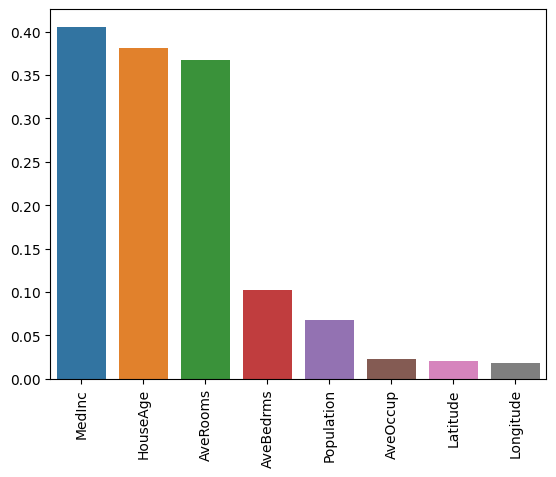

In [35]:
sns.barplot(x=X_train.columns,y=mic)
plt.xticks(rotation=90)
plt.show()

In [36]:
top_cols = SelectPercentile(mutual_info_regression,percentile=20)
top_cols.fit(X_train,y_train)
X_train.columns[top_cols.get_support()]

Index(['MedInc', 'Longitude'], dtype='object')

## Feature selection using chi square test

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [38]:
ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
df = pd.read_csv(os.path.join(ds_path,'titanic.csv'))

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
cat_cols = ['Sex','Embarked','Pclass','Survived']
cat_cols

['Sex', 'Embarked', 'Pclass', 'Survived']

In [43]:
df = df[cat_cols]

In [44]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [45]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [46]:
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

In [47]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
X_train.head()

,Sex,Embarked,Pclass
30,1,0,1
10,0,2,3
873,1,2,3
182,1,2,3
876,1,2,3


In [49]:
from sklearn.feature_selection import chi2

In [50]:
# chi2 returns 2 vlaues 
# f-score p-value
fp_vals = chi2(X_train,y_train)

In [51]:
p_vals = pd.Series(fp_vals[1])
p_vals.index = X_train.columns
p_vals = p_vals.sort_values(ascending =True)

In [52]:
p_vals

Sex         2.009393e-18
Pclass      1.139328e-06
Embarked    1.081017e-02
dtype: float64

## Practice

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [54]:
ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
df = pd.read_csv(os.path.join(ds_path,'mobile_dataset.csv'))

In [55]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


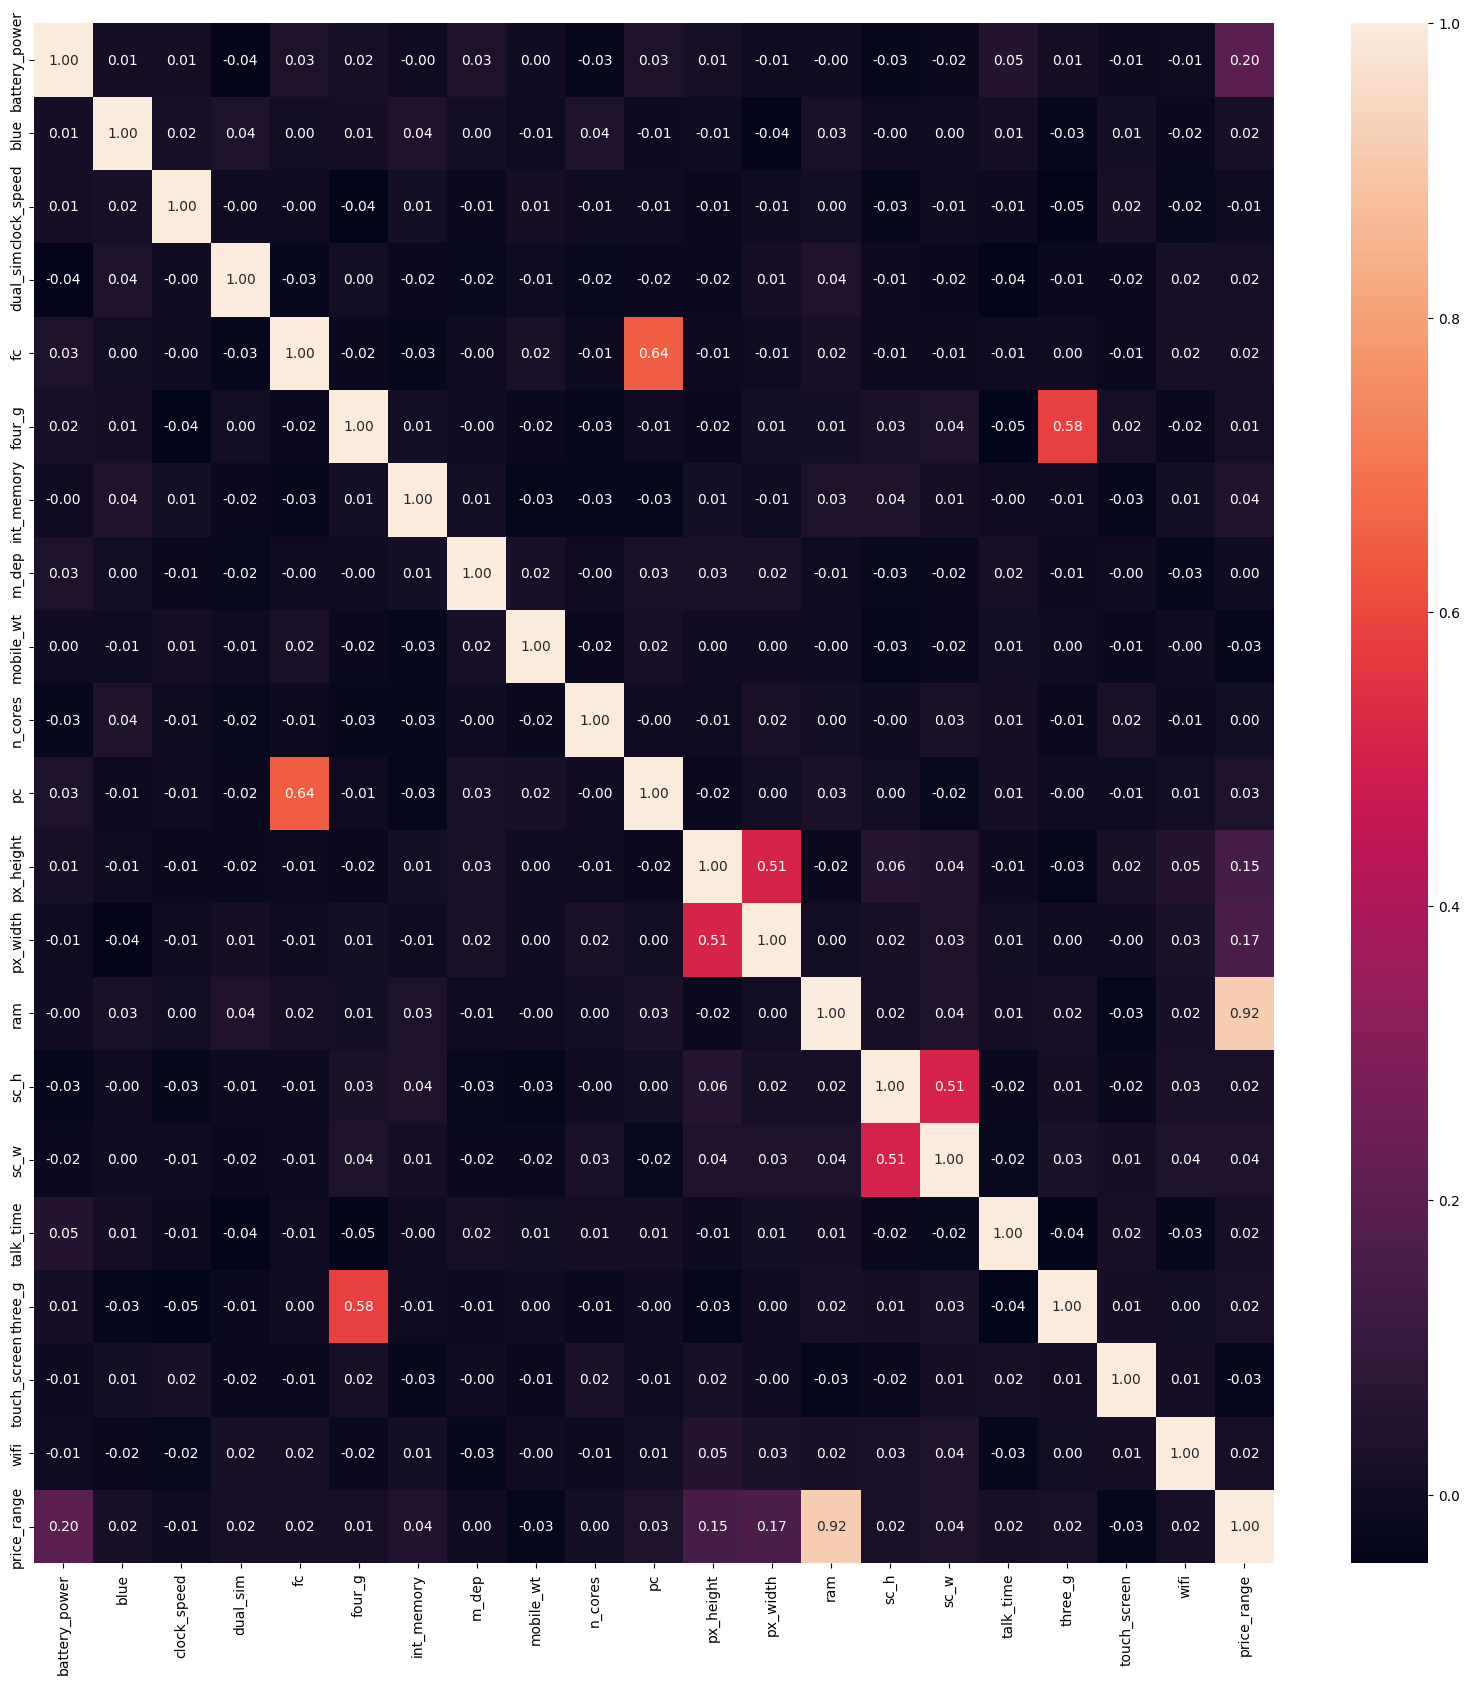

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')
plt.show()

In [87]:
def threshold(dataframe,threshold=0.85):
    col_name = set()
    dataframe = dataframe.corr()
    for i in range(len(dataframe.columns)):
        for j in range(i):
            if abs(dataframe.iloc[i,j])>threshold:
                col_name.add(dataframe.columns[i])
    return col_name

In [89]:
threshold(df.iloc[:,:-1],0.5)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [57]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2
from sklearn.model_selection import train_test_split

In [58]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
top_k_features = SelectKBest(mutual_info_classif,k=10)
top_k = top_k_features.fit(X_train,y_train)

In [60]:
top_k_arr = pd.Series(top_k.scores_,index=X_train.columns).sort_values(ascending=False)

In [61]:
top_k_arr

ram              0.833771
px_height        0.031588
pc               0.027932
n_cores          0.025164
m_dep            0.023497
battery_power    0.018347
clock_speed      0.013273
sc_w             0.011678
fc               0.009023
three_g          0.005751
blue             0.003433
px_width         0.002992
wifi             0.000056
int_memory       0.000000
four_g           0.000000
mobile_wt        0.000000
dual_sim         0.000000
sc_h             0.000000
talk_time        0.000000
touch_screen     0.000000
dtype: float64

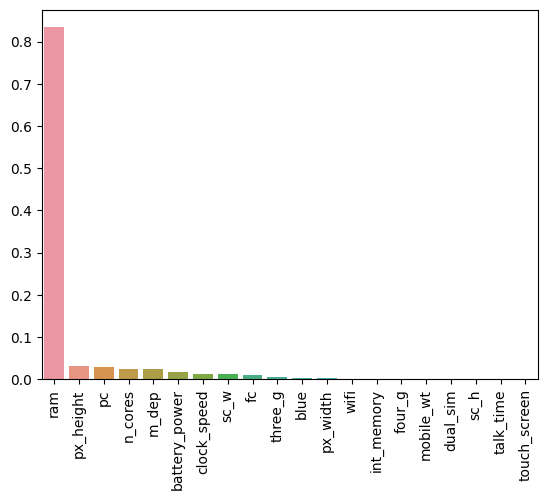

In [62]:
sns.barplot(x=top_k_arr.index,y=top_k_arr)
plt.xticks(rotation=90)
plt.show()

In [64]:
top_k_chi2 = SelectKBest(chi2,k=10)
top_k_chi2 = top_k_chi2.fit(X_train,y_train)

In [65]:
top_k_chi2.scores_

array([1.19004797e+04, 7.01143778e-01, 1.10642655e+00, 9.55733233e-01,
       1.00308427e+01, 4.70250469e-01, 4.42849173e+01, 4.80265685e-01,
       7.38173680e+01, 9.24815546e+00, 1.47711871e+01, 1.38491937e+04,
       8.85413565e+03, 7.25065875e+05, 1.34942013e+01, 2.14827525e+01,
       1.41005455e+01, 6.06682762e-01, 8.91430169e-01, 4.17531046e-01])

In [66]:
top_k_arr = pd.Series(top_k_chi2.scores_,index=X_train.columns).sort_values(ascending=False)
top_k_arr

ram              725065.875123
px_height         13849.193676
battery_power     11900.479688
px_width           8854.135650
mobile_wt            73.817368
int_memory           44.284917
sc_w                 21.482752
pc                   14.771187
talk_time            14.100546
sc_h                 13.494201
fc                   10.030843
n_cores               9.248155
clock_speed           1.106427
dual_sim              0.955733
touch_screen          0.891430
blue                  0.701144
three_g               0.606683
m_dep                 0.480266
four_g                0.470250
wifi                  0.417531
dtype: float64

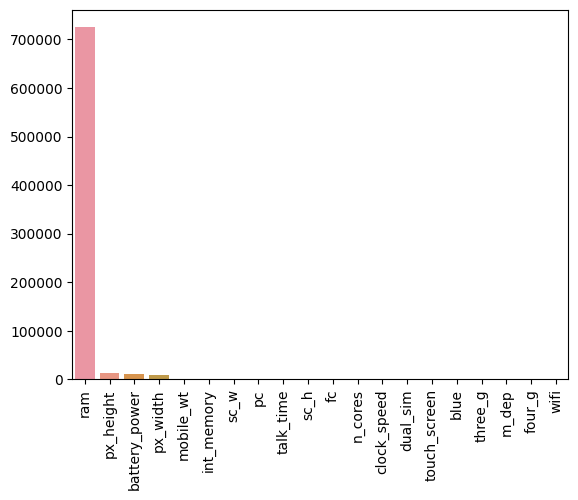

In [67]:
sns.barplot(x=top_k_arr.index,y=top_k_arr)
plt.xticks(rotation=90)
plt.show()

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
e_t_clf = RandomForestClassifier()
e_t_clf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
top_k_arr = pd.Series(e_t_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
top_k_arr

ram              0.465765
battery_power    0.072430
px_width         0.060105
px_height        0.056120
mobile_wt        0.039913
int_memory       0.038968
pc               0.032147
sc_w             0.030784
talk_time        0.030558
clock_speed      0.029830
sc_h             0.029439
fc               0.025469
m_dep            0.025258
n_cores          0.023054
dual_sim         0.007479
four_g           0.006981
blue             0.006664
touch_screen     0.006597
wifi             0.006566
three_g          0.005872
dtype: float64

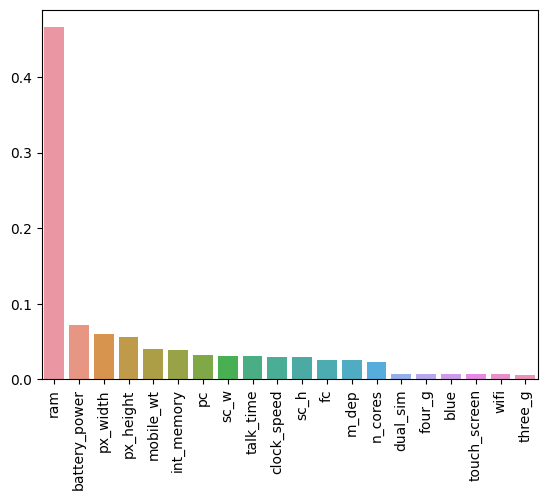

In [77]:
sns.barplot(x=top_k_arr.index,y=top_k_arr)
plt.xticks(rotation=90)
plt.show()

In [90]:
from sklearn.feature_selection import VarianceThreshold

In [103]:
var_thre = VarianceThreshold(threshold=0.1)
th = df.iloc[:,:-1]
var_thre.fit(th)
len(th.columns[var_thre.get_support()])

19